找到的 alpha = 6.1556542986056666


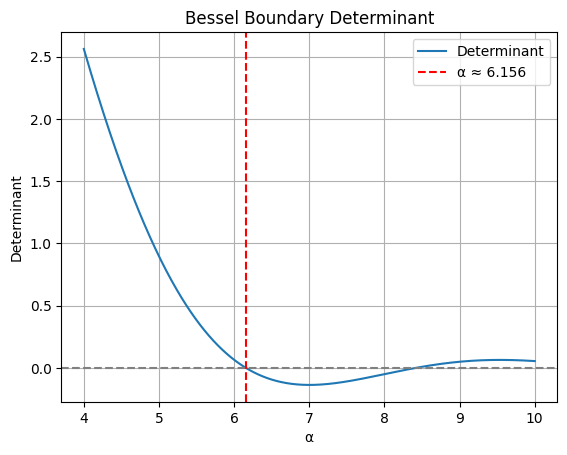

In [1]:
import numpy as np
from scipy.special import jv, yv  # jv = Bessel J_n, yv = Bessel Y_n
from scipy.optimize import newton
import matplotlib.pyplot as plt

# 設定 Bessel 函數階數
n = 8

# 定義行列式函數
def bessel_determinant(alpha):
    return jv(n, alpha) * yv(n, 2 * alpha) - jv(n, 2 * alpha) * yv(n, alpha)

# 對行列式函數取導數（用數值微分）
def bessel_determinant_prime(alpha, h=1e-5):
    return (bessel_determinant(alpha + h) - bessel_determinant(alpha - h)) / (2 * h)

# 初始猜測 (從圖形觀察可以設在 6 附近)
alpha_initial_guess = 6.0

# 使用牛頓法找 alpha 的根
alpha_root = newton(bessel_determinant, alpha_initial_guess, fprime=bessel_determinant_prime)
print(f"找到的 alpha = {alpha_root:.16f}")

# 繪圖看一下行列式在哪裡過零
alphas = np.linspace(4, 10, 500)
dets = [bessel_determinant(a) for a in alphas]

plt.plot(alphas, dets, label="Determinant")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(alpha_root, color='red', linestyle='--', label=f'α ≈ {alpha_root:.3f}')
plt.xlabel("α")
plt.ylabel("Determinant")
plt.title("Bessel Boundary Determinant")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/xw/460kbmwd03b4w67v8f_qdh800000gn/T/ipykernel_22246/1206457617.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, u, shading='auto', cmap='viridis')


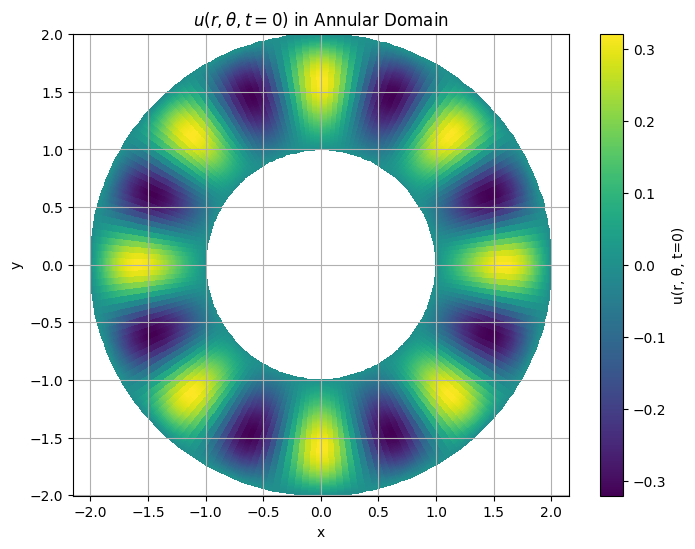

In [2]:
import numpy as np
from scipy.special import jv, yv
import matplotlib.pyplot as plt

# 使用 alpha 的根（你也可以直接指定）
alpha = alpha_root  # 可以從前面牛頓法找到的值代入更精確的

n = 8  # 階數

# 設定 r 和 theta 的網格
K, N = 100, 200
r = np.linspace(1, 2, K)
theta = np.linspace(0, 2 * np.pi, N)
R, Theta = np.meshgrid(r, theta, indexing='ij')  # R: (K, N), Theta: (K, N)

# 設定 A = 1，根據邊界條件在 r=1 解出 B
A = 1.0
J1 = jv(n, alpha * 1)
Y1 = yv(n, alpha * 1)
J2 = jv(n, alpha * 2)
Y2 = yv(n, alpha * 2)

# 解聯立方程 A*J1 + B*Y1 = 0 → B = -A*J1/Y1
B = -A * J1 / Y1

# 計算 u(r, theta, t=0)
hat_u = A * jv(n, alpha * R) + B * yv(n, alpha * R)
u = hat_u * np.cos(n * Theta)

# 將極座標轉換為直角座標以便繪圖
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# 繪圖
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, u, shading='auto', cmap='viridis')
plt.colorbar(label='u(r, θ, t=0)')
plt.title(r'$u(r, \theta, t=0)$ in Annular Domain')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()


/var/folders/xw/460kbmwd03b4w67v8f_qdh800000gn/T/ipykernel_22246/1864418031.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, u_prime, shading='auto', cmap='viridis')


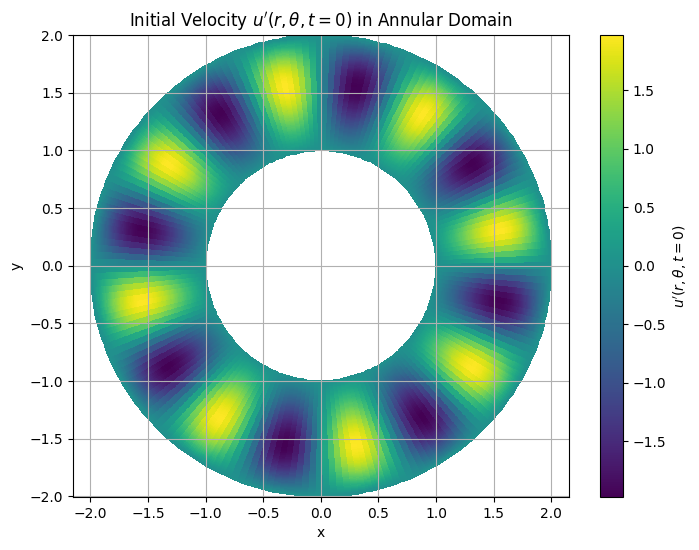

In [3]:
import numpy as np
from scipy.special import jv, yv
import matplotlib.pyplot as plt

# 使用已知的 alpha 值
alpha = alpha_root  # 可改為從牛頓法找到的精確值
n = 8            # 階數
c = 1.0          # 波速，假設為 1，則 omega = alpha * c
omega = alpha * c

# 建立 r 和 theta 的網格
K, N = 100, 200
r = np.linspace(1, 2, K)
theta = np.linspace(0, 2 * np.pi, N)
R, Theta = np.meshgrid(r, theta, indexing='ij')

# 解出 A, B
A = 1.0
J1 = jv(n, alpha * 1)
Y1 = yv(n, alpha * 1)
B = -A * J1 / Y1

# 計算 hat_u(r)
hat_u = A * jv(n, alpha * R) + B * yv(n, alpha * R)

# 初始速度場：u'(r, θ, t=0)
u_prime = omega * hat_u * np.sin(n * Theta)

# 轉換為直角座標繪圖
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# 繪圖
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, u_prime, shading='auto', cmap='viridis')
plt.colorbar(label=r"$u'(r, \theta, t=0)$")
plt.title(r"Initial Velocity $u'(r, \theta, t=0)$ in Annular Domain")
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()
